In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
from IPython.display import display, HTML
import os
import pandas as pd

def getFiles(path, kind='csv'):
    kind = '.'+kind
    fn = len(kind)
    filenames = []
    for root, dirs, files in os.walk(path):
        for f in files:
            if f[-fn:] == kind:
                filenames.append(os.path.join(root, f))
    print('Total number of {0} files: '.format(kind[1:]), len(filenames))
    return filenames 

dx = 0.156
dt = 1./15.

Populating the interactive namespace from numpy and matplotlib


# Data
The data consists of tracks from 27 different videos of wild type (WT) Salmonella in mouse GI mucus. An example is seen in the video below.

Note that the x, y positions are given in pixel coordinates and t is given in frames. The conversion to physical units is `dx=0.156` micrometers and `dt=0.0667` seconds.

### Our paper
https://www.nature.com/articles/s41385-020-0267-9.pdf?origin=ppub

In [2]:
HTML("""<video width="512" height="512" 
controls autoplay loop 
src="Videos/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_1.mp4">
""")

## Get a list of all CSV files in the 'Tracks' folder (including subfolders)

In [3]:
files = getFiles('./Tracks')
files

Total number of csv files:  27


['./Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_6.csv',
 './Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_1.csv',
 './Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_7.csv',
 './Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_5.csv',
 './Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_2.csv',
 './Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_3.csv',
 './Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_4.csv',
 './Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_9.csv',
 './Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_8.csv',
 './Tracks/160706_WT_Q/Ileum/160706_WT_Q_Ileum_NoAbAdded_11.csv',
 './Tracks/160706_WT_Q/Ileum/160706_WT_Q_Ileum_NoAbAdded_10.csv',
 './Tracks/160706_WT_Q/Ileum/160706_WT_Q_Ileum_NoAbAdded_7.csv',
 './Tracks/160706_WT_Q/Ileum/160706_WT_Q_Ileum_NoAbAdded_1.csv',
 './Tracks/160706_WT_Q/Ileum/160706_WT_Q_Ileum_NoAbAdded_6.csv',
 './Tracks/160706_WT_Q/Ileum/16070

## Example of loading one file using Pandas

In [4]:
print(files[0])
tracks = pd.read_csv(files[0])
tracks

./Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_6.csv


,particle,x,y,t
0,0,364.975189,449.967438,0
1,0,365.593170,450.349060,1
2,0,365.131226,450.742096,2
3,0,364.594727,451.027954,3
4,0,364.323639,450.956909,4
5,0,364.131775,451.147491,5
6,0,363.757874,451.658356,6
7,0,363.666077,451.785461,7
8,0,364.289124,450.960785,8
9,0,364.544037,450.361938,9


## Extract the first track

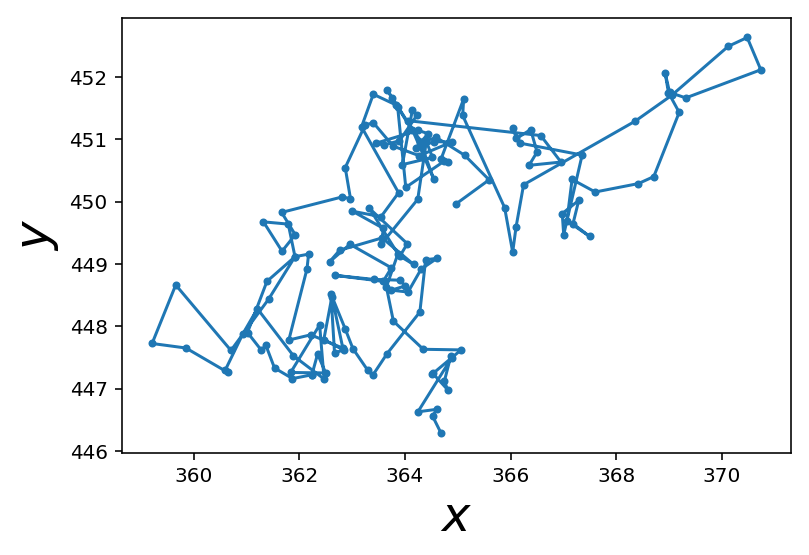

In [5]:
track = tracks[tracks.particle==0]
plot(track.x, track.y, '.-')
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);

## Example of iterating over all tracks with the DataFrame `.groupby()` method

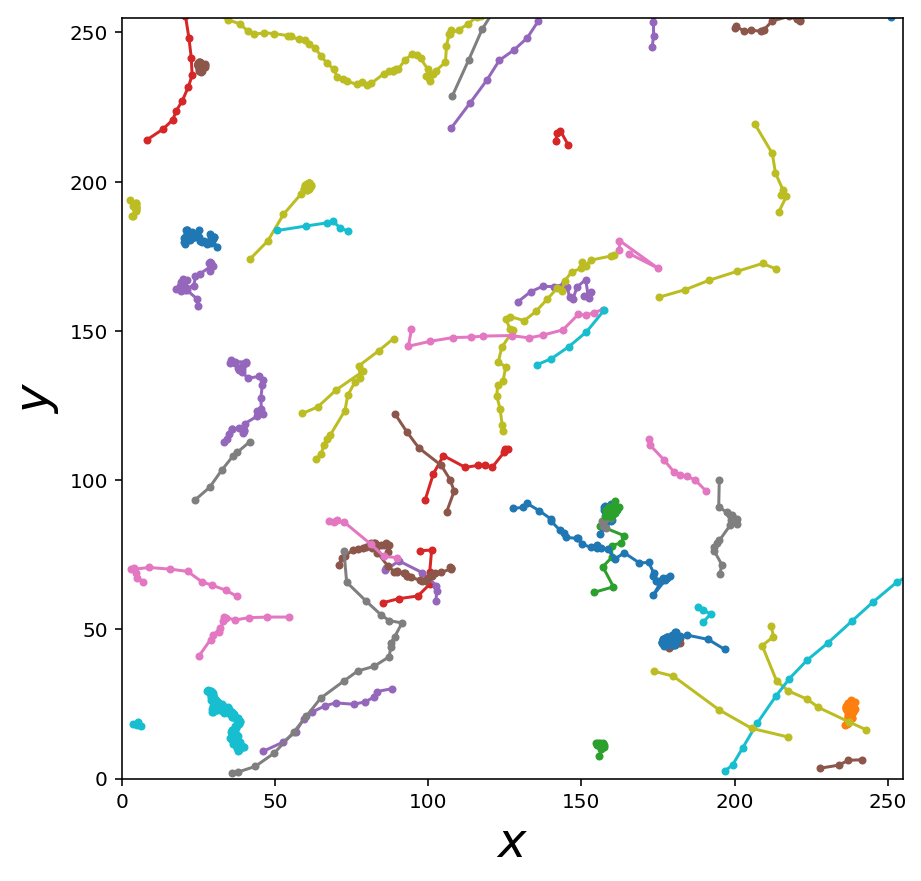

In [6]:
figure(1, [7, 7])
for track_number, track in tracks.groupby('particle'):
    plot(track.x, track.y, '.-')
xlim(0, 255)
ylim(0, 255)
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);

# Goal 1: Estimate swim speed
Assume that while swimming individual Salmonella all swim at the same average speed and that the speed is the same regardless of what direction they happen to be swimming. Using the track data, estimate the (magnitude) swim speed of Salmonella in mucus.

# Goal 2: Develop a stochastic model of Salmonella motion and predict the mean first passage time to cross a mucus barrier

# Goal 3: Estimate the fraction of cells that are mobile vs immobile